In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2024/players.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_7.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_9.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_6.csv
/kaggle/input/nfl-big-data-bowl-2024/games.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_8.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_4.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_3.csv
/kaggle/input/nfl-big-data-bowl-2024/tackles.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_5.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_1.csv
/kaggle/input/nfl-big-data-bowl-2024/plays.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_2.csv


In [4]:
games=pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/games.csv')
players=pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/players.csv')
tackles=pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/tackles.csv')
plays=pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/plays.csv')

In [8]:
#Data Inspection
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gameId             136 non-null    int64 
 1   season             136 non-null    int64 
 2   week               136 non-null    int64 
 3   gameDate           136 non-null    object
 4   gameTimeEastern    136 non-null    object
 5   homeTeamAbbr       136 non-null    object
 6   visitorTeamAbbr    136 non-null    object
 7   homeFinalScore     136 non-null    int64 
 8   visitorFinalScore  136 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 9.7+ KB


In [4]:
players.info()
# There are 479 null value in the birthdate column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1683 non-null   int64 
 1   height       1683 non-null   object
 2   weight       1683 non-null   int64 
 3   birthDate    1204 non-null   object
 4   collegeName  1683 non-null   object
 5   position     1683 non-null   object
 6   displayName  1683 non-null   object
dtypes: int64(2), object(5)
memory usage: 92.2+ KB


In [5]:
tackles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17426 entries, 0 to 17425
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gameId            17426 non-null  int64
 1   playId            17426 non-null  int64
 2   nflId             17426 non-null  int64
 3   tackle            17426 non-null  int64
 4   assist            17426 non-null  int64
 5   forcedFumble      17426 non-null  int64
 6   pff_missedTackle  17426 non-null  int64
dtypes: int64(7)
memory usage: 953.1 KB


In [6]:
plays.info()
#passResult,yardlineSide, passLength,penaltyYards,offenseFormation,defendersInTheBox,passProbability,expectedPointsAdded,foulName1, foulName2,foulNFLId1,foulNFLId2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12486 entries, 0 to 12485
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gameId                            12486 non-null  int64  
 1   playId                            12486 non-null  int64  
 2   ballCarrierId                     12486 non-null  int64  
 3   ballCarrierDisplayName            12486 non-null  object 
 4   playDescription                   12486 non-null  object 
 5   quarter                           12486 non-null  int64  
 6   down                              12486 non-null  int64  
 7   yardsToGo                         12486 non-null  int64  
 8   possessionTeam                    12486 non-null  object 
 9   defensiveTeam                     12486 non-null  object 
 10  yardlineSide                      12319 non-null  object 
 11  yardlineNumber                    12486 non-null  int64  
 12  game

In [9]:
players.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


In [10]:
tackles.head()

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,101,42816,1,0,0,0
1,2022090800,393,46232,1,0,0,0
2,2022090800,486,40166,1,0,0,0
3,2022090800,646,47939,1,0,0,0
4,2022090800,818,40107,1,0,0,0


In [11]:
plays.head()

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,...,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,...,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,...,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN


In [7]:
#Games Insights
games_by_date = games['gameDate'].value_counts().reset_index()

games_by_date.columns = ['date', 'games']
games_by_date = games_by_date.sort_values('date')

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

plt.title('games_by_date')
bars = plt.bar(games_by_date.date,games_by_date.games,color = 'darkviolet')
plt.xticks(rotation=90)
plt.xlabel('date')
plt.ylabel('games')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

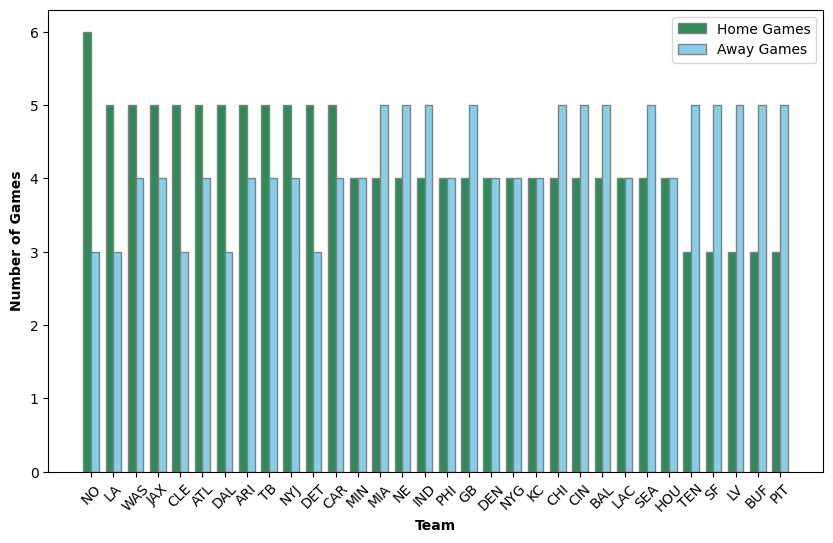

In [8]:
#home and away games by team
home = games['homeTeamAbbr'].value_counts().reset_index()
home.columns = ['team','home_games']


away = games['visitorTeamAbbr'].value_counts().reset_index()
away.columns = ['team','away_games']

merged = pd.merge(home,away,how= 'outer', on='team')


fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
r1 = range(len(merged['team']))
r2 = [x + bar_width for x in r1]


plt.bar(r1, merged['home_games'], color='seagreen', width=bar_width, edgecolor='grey', label='Home Games')
plt.bar(r2, merged['away_games'], color='skyblue', width=bar_width, edgecolor='grey', label='Away Games')
plt.xlabel('Team', fontweight='bold')
plt.ylabel('Number of Games', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(merged['team']))], merged['team'], rotation=45)
plt.legend()

plt.show()


In [70]:
#player insights
import datetime 
date_format = "%Y-%m-%d"
for idx,row in players.iterrows():
    birth_date = str(row['birthDate'])
    if '-' in birth_date:
        players.at[idx,'age'] = datetime.datetime.now().year-datetime.datetime.strptime(row.birthDate,date_format).year
    else:
        players.at[idx, 'age'] = 0
    

Text(0, 0.5, 'Frequency')

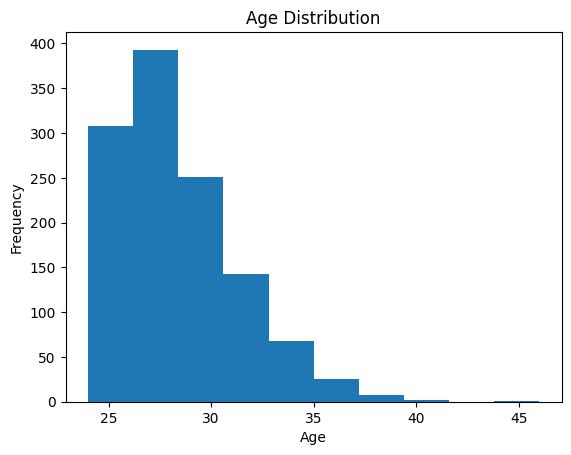

In [90]:
players = players.loc[players['age']!=0]

plt.hist(players['age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')


In [96]:
#Position_Age
position_age = players.groupby('position').agg(
    age = ('age','mean')
)

# player_performance = tackles.groupby('nflId').agg(
#     total_tackles = ('total_tackles', 'sum'),
#     missed_tackles = ('pff_missedTackle', 'sum'),
#     forced_fumbles = ('forcedFumble','sum')
# )

print(position_age)


                age
position           
C         29.177778
CB        27.697479
DB        25.000000
DE        28.943820
DT        28.329545
FB        29.300000
FS        28.344828
G         28.468354
ILB       28.191176
LS        28.000000
MLB       27.909091
NT        29.583333
OLB       28.516129
QB        31.104167
RB        27.566265
SS        28.269231
T         29.125000
TE        28.477778
WR        27.960265


In [102]:
def group_position(position):
    if position in ['QB', 'T', 'TE', 'WR', 'C', 'G', 'RB', 'FB']:
        return 'offensive'
    else:
        return 'defensive'
    
players['position_group'] = players['position'].apply(group_position)

position_group_age = players.groupby('position_group').agg(
    age = ('age','mean')
)
print (position_group_age)

                      age
position_group           
defensive       28.341060
offensive       28.592593


In [92]:
games

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,09/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,09/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,09/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,09/11/2022,13:00:00,CIN,PIT,20,23
...,...,...,...,...,...,...,...,...,...
131,2022110607,2022,9,11/06/2022,13:00:00,WAS,MIN,17,20
132,2022110608,2022,9,11/06/2022,16:05:00,ARI,SEA,21,31
133,2022110609,2022,9,11/06/2022,16:25:00,TB,LA,16,13
134,2022110610,2022,9,11/06/2022,20:20:00,KC,TEN,20,17


In [13]:
# Calculation of Total tackle
tackles['total_tackles'] = tackles['tackle']+ tackles['assist']
player_performance = tackles.groupby('nflId').agg(
    total_tackles = ('total_tackles', 'sum'),
    missed_tackles = ('pff_missedTackle', 'sum'),
    forced_fumbles = ('forcedFumble','sum')
)

In [17]:
# Calculate tackle efficiency
player_performance['tackle_efficiency'] = player_performance['total_tackles']/(player_performance['total_tackles']+player_performance['missed_tackles'])

In [18]:
player_performance

,total_tackles,missed_tackles,forced_fumbles,tackle_efficiency
nflId,,,,
33131,18,4,0,0.818182
35449,8,1,0,0.888889
35452,12,1,0,0.923077
35454,6,1,0,0.857143
35459,51,9,0,0.850000
...,...,...,...,...
55190,1,0,0,1.000000
55200,1,0,0,1.000000
55239,3,0,0,1.000000


In [19]:
player_performance = player_performance.merge(players[['nflId','displayName','position']],on= 'nflId')

In [22]:
player_performance

,nflId,total_tackles,missed_tackles,forced_fumbles,tackle_efficiency,displayName,position
0,33131,18,4,0,0.818182,Calais Campbell,DE
1,35449,8,1,0,0.888889,Tyson Alualu,NT
2,35452,12,1,0,0.923077,Brandon Graham,DE
3,35454,6,1,0,0.857143,Jason Pierre-Paul,DE
4,35459,51,9,0,0.850000,Kareem Jackson,SS
...,...,...,...,...,...,...,...
795,55190,1,0,0,1.000000,Sam Okuayinonu,DE
796,55200,1,0,0,1.000000,Ryder Anderson,DT
797,55239,3,0,0,1.000000,Prince Emili,DT
798,55240,3,0,0,1.000000,Ja'Marcus Ingram,CB


In [23]:
player_performance_sorted = player_performance.sort_values(by='tackle_efficiency',ascending = False)

In [24]:
player_performance_sorted

,nflId,total_tackles,missed_tackles,forced_fumbles,tackle_efficiency,displayName,position
400,47837,3,0,0,1.0,Lonnie Johnson,CB
470,48500,1,0,0,1.0,Saivion Smith,CB
468,48487,2,0,0,1.0,Cameron Lewis,CB
464,48462,9,0,0,1.0,Kevin Strong,DE
463,48454,1,0,0,1.0,C.J. Moore,FS
...,...,...,...,...,...,...,...
747,54624,0,1,0,0.0,Eric Johnson,DT
572,52932,0,1,0,0.0,Ladarius Hamilton,OLB
785,55030,0,1,0,0.0,Demetrius Taylor,DT
258,45045,0,1,0,0.0,Elijah Lee,OLB
